In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import directly from the local modules
from preprocessing import (
    convert_to_grayscale, 
    apply_gaussian_filter, 
    apply_bilateral_filter,
    apply_clahe, 
    normalize, 
    resize_image,
    preprocess_ultrasound_image
)
from dataset import BUSIDataset

In [2]:
# Set the data directory
data_dir = "../Dataset_BUSI_with_GT/benign"

In [3]:
# Create datasets with different denoising methods
dataset_gaussian = BUSIDataset(data_dir, denoising_method="gaussian")
dataset_bilateral = BUSIDataset(data_dir, denoising_method="bilateral")

Found 437 image-mask pairs in ../Dataset_BUSI_with_GT/benign
Using gaussian denoising method
Found 437 image-mask pairs in ../Dataset_BUSI_with_GT/benign
Using bilateral denoising method


In [4]:
# Function to visualize the comparison
def visualize_comparison(idx):
    """Compare the same image processed with different denoising methods."""
    # Load the original image
    image_path = dataset_gaussian.image_files[idx]
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_gray = convert_to_grayscale(original_image)
    
    # Get the processed samples
    sample_gaussian = dataset_gaussian[idx]
    sample_bilateral = dataset_bilateral[idx]
    
    # Extract images
    image_gaussian = sample_gaussian['image'].numpy()[0]  # Remove channel dimension
    image_bilateral = sample_bilateral['image'].numpy()[0]  # Remove channel dimension
    mask = sample_gaussian['mask'].numpy()[0]  # Remove channel dimension
    
    # Compute edge maps
    sobelx_gaussian = cv2.Sobel(image_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    sobely_gaussian = cv2.Sobel(image_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    gradient_gaussian = np.sqrt(sobelx_gaussian**2 + sobely_gaussian**2)
    
    sobelx_bilateral = cv2.Sobel(image_bilateral, cv2.CV_64F, 1, 0, ksize=3)
    sobely_bilateral = cv2.Sobel(image_bilateral, cv2.CV_64F, 0, 1, ksize=3)
    gradient_bilateral = np.sqrt(sobelx_bilateral**2 + sobely_bilateral**2)
    
    # Normalize gradient maps for visualization
    gradient_gaussian_norm = gradient_gaussian / gradient_gaussian.max()
    gradient_bilateral_norm = gradient_bilateral / gradient_bilateral.max()
    
    # Calculate difference between preprocessing methods
    diff = np.abs(image_gaussian - image_bilateral)
    diff_normalized = diff / np.max(diff) if np.max(diff) > 0 else diff
    
    # Create figure for comparison
    fig, axes = plt.subplots(2, 4, figsize=(18, 10))
    
    # First row: Original and processed images
    axes[0, 0].imshow(original_gray, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(image_gaussian, cmap='gray')
    axes[0, 1].set_title('Gaussian Filtering')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(image_bilateral, cmap='gray')
    axes[0, 2].set_title('Bilateral Filtering')
    axes[0, 2].axis('off')
    
    axes[0, 3].imshow(diff_normalized, cmap='hot')
    axes[0, 3].set_title('Difference')
    axes[0, 3].axis('off')
    
    # Second row: Edge maps and overlays
    axes[1, 0].imshow(gradient_gaussian_norm, cmap='gray')
    axes[1, 0].set_title('Edges (Gaussian)')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(gradient_bilateral_norm, cmap='gray')
    axes[1, 1].set_title('Edges (Bilateral)')
    axes[1, 1].axis('off')
    
    # Mask overlay with each processed image
    axes[1, 2].imshow(image_gaussian, cmap='gray')
    axes[1, 2].imshow(mask, alpha=0.3, cmap='Reds')
    axes[1, 2].set_title('Mask Overlay (Gaussian)')
    axes[1, 2].axis('off')
    
    axes[1, 3].imshow(image_bilateral, cmap='gray')
    axes[1, 3].imshow(mask, alpha=0.3, cmap='Reds')
    axes[1, 3].set_title('Mask Overlay (Bilateral)')
    axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Sample {idx}:")
    print(f"Gaussian: Min={image_gaussian.min():.3f}, Max={image_gaussian.max():.3f}, Mean={image_gaussian.mean():.3f}")
    print(f"Bilateral: Min={image_bilateral.min():.3f}, Max={image_bilateral.max():.3f}, Mean={image_bilateral.mean():.3f}")
    print(f"Average edge strength (Gaussian): {np.mean(gradient_gaussian):.3f}")
    print(f"Average edge strength (Bilateral): {np.mean(gradient_bilateral):.3f}")
    print(f"Difference (Mean Absolute Difference): {np.mean(diff):.5f}")

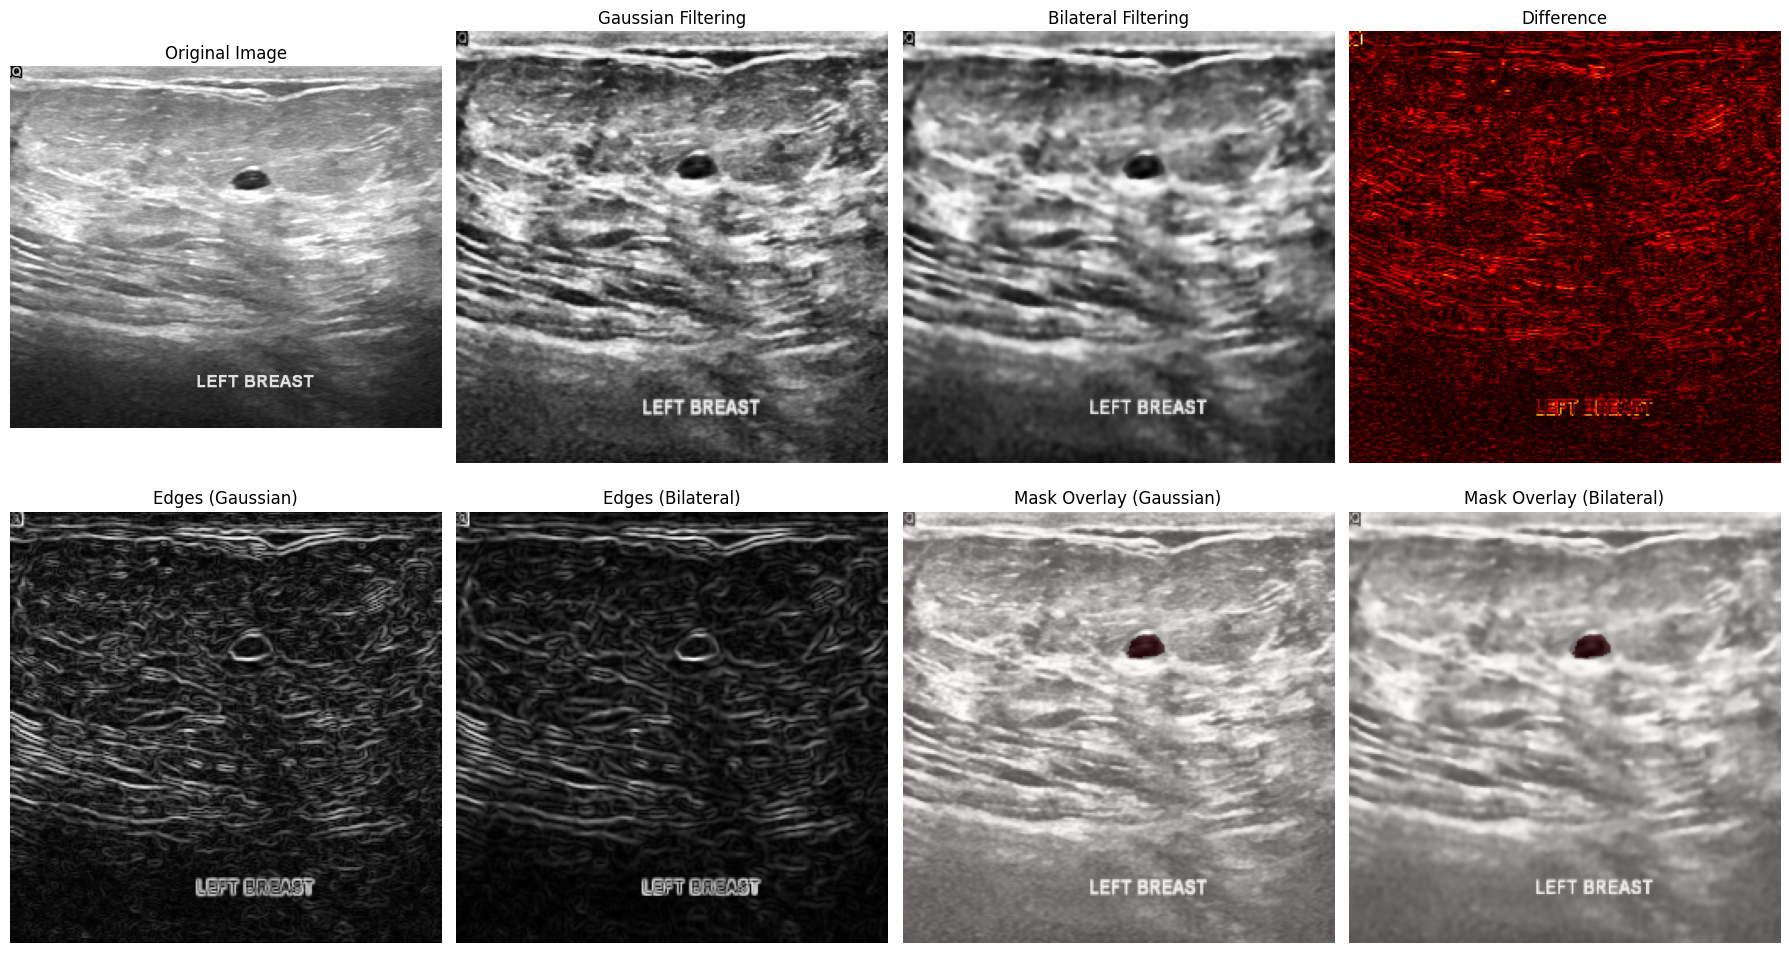

Sample 0:
Gaussian: Min=0.010, Max=1.000, Mean=0.464
Bilateral: Min=0.023, Max=1.000, Mean=0.467
Average edge strength (Gaussian): 0.552
Average edge strength (Bilateral): 0.406
Difference (Mean Absolute Difference): 0.03412

--------------------------------------------------



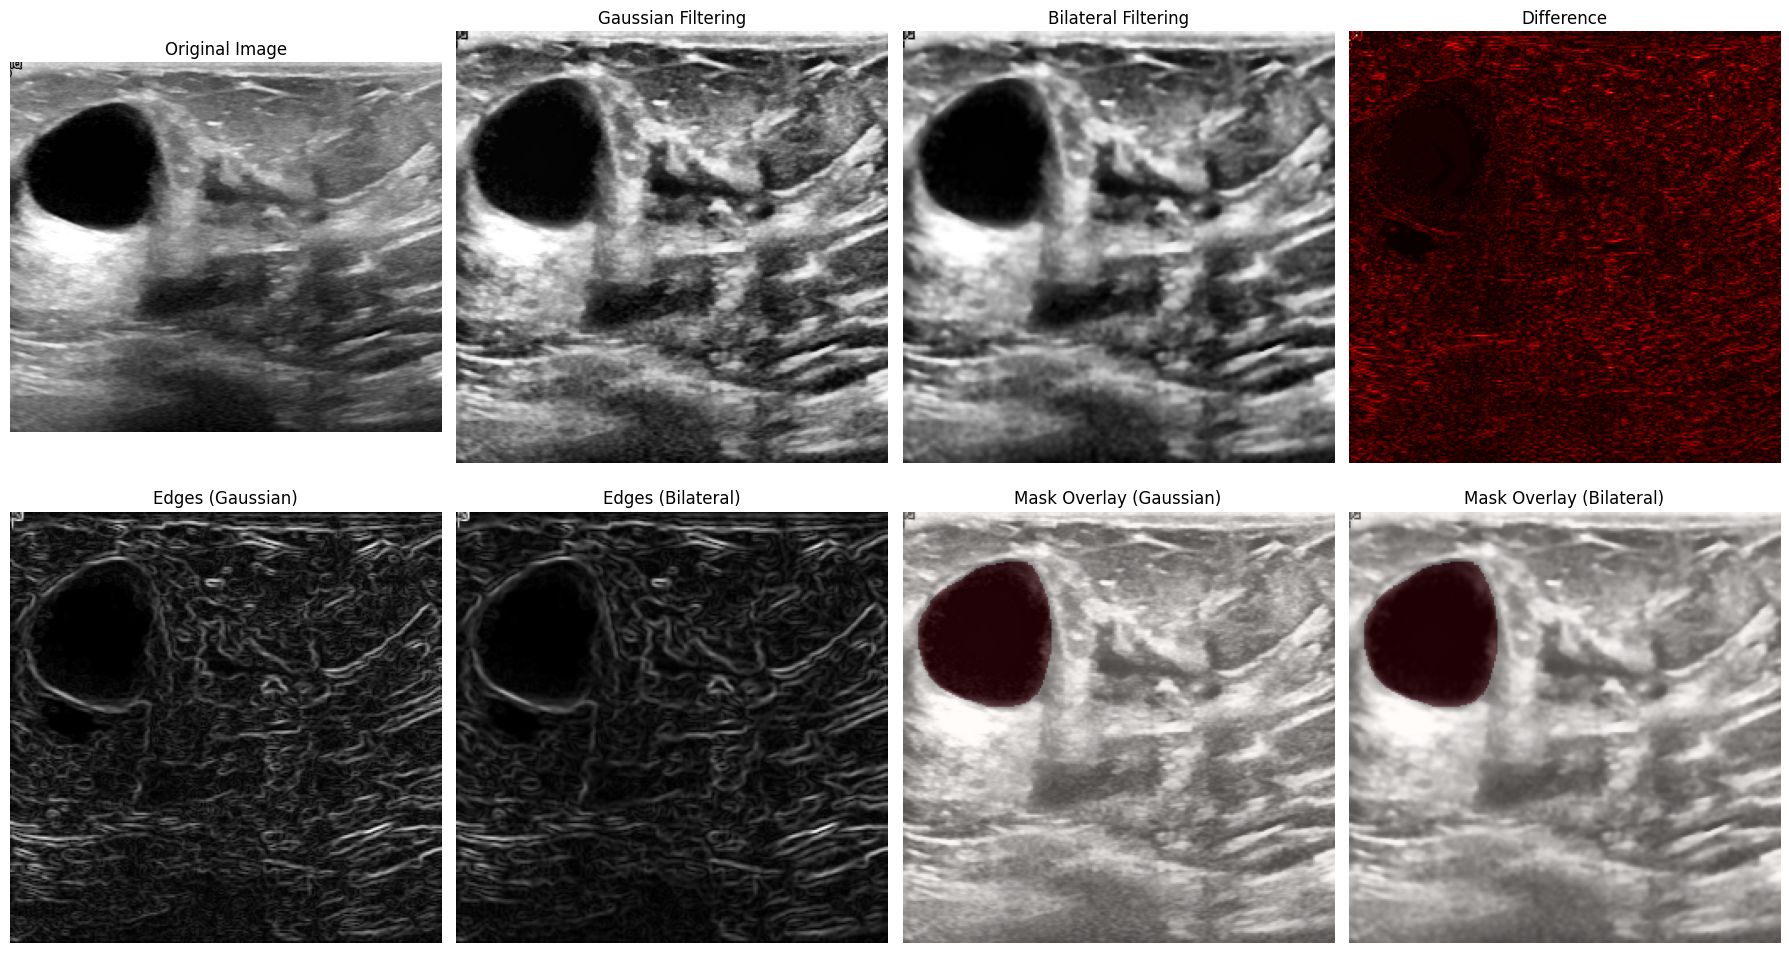

Sample 1:
Gaussian: Min=0.004, Max=1.000, Mean=0.436
Bilateral: Min=0.007, Max=1.000, Mean=0.433
Average edge strength (Gaussian): 0.479
Average edge strength (Bilateral): 0.390
Difference (Mean Absolute Difference): 0.02387

--------------------------------------------------



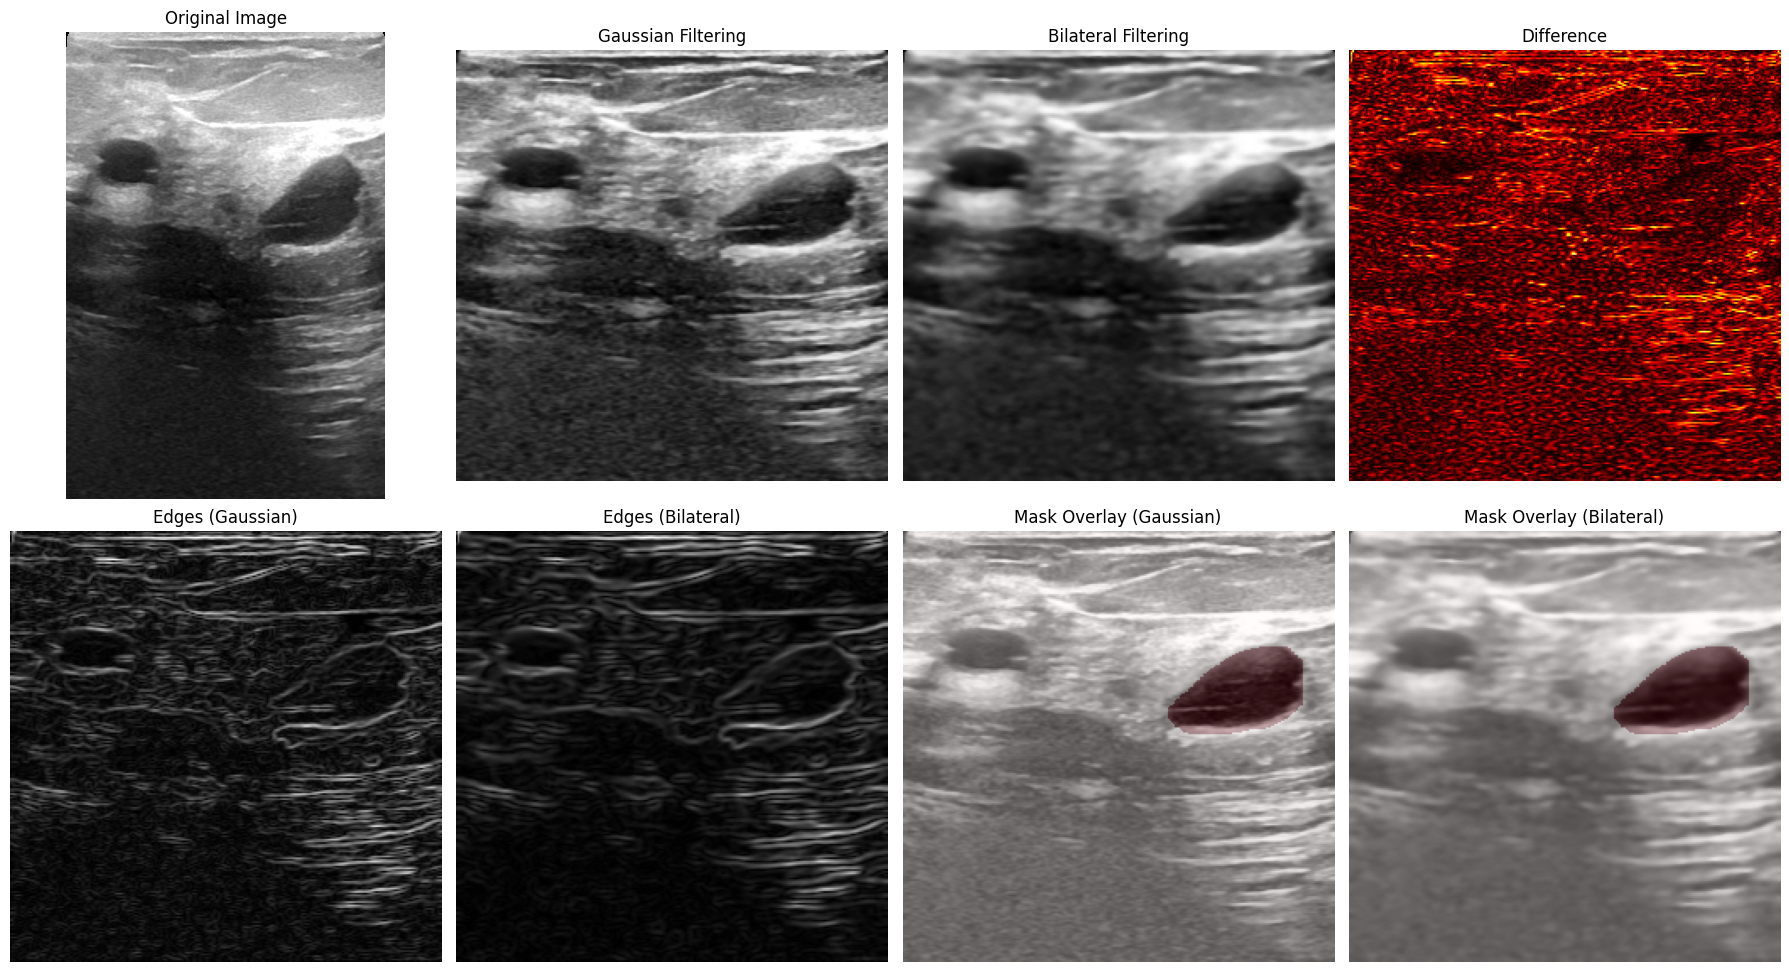

Sample 2:
Gaussian: Min=0.008, Max=1.000, Mean=0.378
Bilateral: Min=0.022, Max=1.000, Mean=0.373
Average edge strength (Gaussian): 0.386
Average edge strength (Bilateral): 0.262
Difference (Mean Absolute Difference): 0.03118

--------------------------------------------------



In [5]:
# Compare a few samples
for i in range(3):
    visualize_comparison(i)
    print("\n" + "-"*50 + "\n")